<a href="https://colab.research.google.com/github/rw417/ids706_aws/blob/main/Project6_Text_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

This is a convenient location to collect data and store it for later use

In [2]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [1]:
from pathlib import Path
import spacy

In [2]:
#grab text
!rm *.txt
!wget https://raw.githubusercontent.com/noahgift/exploratory-data-analysis/main/hemingway-sun-also-rises.txt

rm: cannot remove '*.txt': No such file or directory
--2021-10-01 19:52:17--  https://raw.githubusercontent.com/noahgift/exploratory-data-analysis/main/hemingway-sun-also-rises.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364659 (356K) [text/plain]
Saving to: ‘hemingway-sun-also-rises.txt’

hemingway-sun-also- 100%[===================>] 356.11K  --.-KB/s    in 0.08s   

2021-10-01 19:52:18 (4.40 MB/s) - ‘hemingway-sun-also-rises.txt’ saved [364659/364659]



In [3]:
sar_text = Path('hemingway-sun-also-rises.txt').read_text()

## EDA

### Word Visualizations

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!python -m textblob.download_corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [5]:
#remove stop words
from textblob import TextBlob
from nltk.corpus import stopwords

In [6]:
stop_words = stopwords.words('english')

In [31]:
sar_blob = TextBlob(Path('hemingway-sun-also-rises.txt').read_text())

In [8]:
#without stop word removal
sar_count = sar_blob.word_counts.items()

In [10]:
len(sar_count)

4953

In [37]:
def remove_stop(words):
    no_stop = []
    for word in words:
        if word[0] not in stop_words:
            no_stop.append(word)
    return no_stop


In [38]:
no_stop_words = remove_stop(sar_count)

In [39]:
#the stop words are removed
len(no_stop_words)

4811

In [40]:
# A few words
no_stop_words[0:5]

[('sun', 27), ('also', 7), ('rises', 1), ('ernest', 1), ('hemingway', 1)]

### Word cloud

In [20]:
from wordcloud import WordCloud

In [21]:
word_cloud_text = str1 = ' '.join(no_stop_words)
wordcloud = WordCloud().generate(word_cloud_text)

(-0.5, 399.5, 199.5, -0.5)

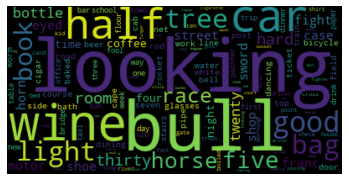

In [22]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Cloud-based NoCode-LowCode Tool

In [17]:
from pandas import DataFrame
df = DataFrame(no_stop_words, columns=["sar_words"])
df.head()

,sar_words
0,sun
1,also
2,rises
3,ernest
4,hemingway


In [24]:
df.to_csv("hemingway-sun-also-rises.txt",index=False)

### Plotly visualize

More work needs to be done

In [18]:
from plotly.offline import iplot
import plotly.graph_objs as go

In [26]:
fig = go.Figure(data=go.Bar(y=no_stop_words))
iplot(fig)

In [29]:
df2 = DataFrame(sar_count)

In [36]:
sar_count

dict_items([('the', 4498), ('sun', 27), ('also', 7), ('rises', 1), ('by', 104), ('ernest', 1), ('hemingway', 1), ('this', 145), ('book', 24), ('is', 261), ('for', 374), ('hadley', 2), ('and', 2294), ('john', 1), ('nicanor', 1), ('you', 1174), ('are', 114), ('all', 437), ('a', 1535), ('lost', 10), ('generation', 3), ('gertrude', 1), ('stein', 1), ('in', 1041), ('conversation', 3), ('one', 262), ('passeth', 1), ('away', 79), ('another', 80), ('cometh', 1), ('but', 191), ('earth', 6), ('abideth', 1), ('forever', 1), ('ariseth', 1), ('goeth', 2), ('down', 271), ('hasteth', 1), ('to', 1547), ('place', 33), ('where', 116), ('he', 1087), ('arose', 1), ('wind', 22), ('toward', 42), ('south', 16), ('turneth', 1), ('about', 220), ('unto', 2), ('north', 4), ('it', 1153), ('whirleth', 1), ('continually', 1), ('returneth', 1), ('again', 82), ('according', 1), ('his', 411), ('circuits', 1), ('rivers', 3), ('run', 7), ('into', 164), ('sea', 13), ('yet', 22), ('not', 420), ('full', 27), ('from', 237),